<a href="https://colab.research.google.com/github/ckraju/mits/blob/master/krishnaprabha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from google.colab import files
uploaded = files.upload()

Saving sample640.csv to sample640 (1).csv


KeyboardInterrupt: ignored

In [0]:
import pandas as pd


In [0]:
import io

df2 = pd.read_csv(io.BytesIO(uploaded['sample640.csv']))

# Dataset is now stored in a Pandas Dataframe

In [0]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
from keras.utils import to_categorical

In [0]:
# fix random seed for reproducibility
#seed = 5
#numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("sample640.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:640]
Y = dataset[:,640]

In [113]:
X

array([[ 2.01216985e-03,  4.30685562e-04,  4.44108667e-03, ...,
         1.52887931e-01,  1.69216859e+00,  1.47828408e+00],
       [-7.13038377e-04, -3.09778156e-03,  8.22632253e-04, ...,
         1.49532349e-01,  1.68735175e+00,  1.47754839e+00],
       [-3.00873506e-04,  4.02494276e-03, -4.27990370e-03, ...,
         1.57004038e-01,  1.69615790e+00,  1.47676952e+00],
       ...,
       [ 2.26422377e-03,  1.91372754e-03, -4.72440731e-03, ...,
         1.49547676e+00,  2.03379548e+00,  4.70046831e-01],
       [-1.84641610e-03,  9.81615310e-04,  2.07430737e-03, ...,
         1.49652694e+00,  2.03244357e+00,  4.68514815e-01],
       [ 4.36300324e-04, -2.92414153e-03,  1.97867842e-03, ...,
         1.49461981e+00,  2.03294508e+00,  4.69365605e-01]])

In [114]:
Y

array([5., 5., 5., ..., 6., 6., 6.])

In [102]:
Y.shape

(5001, 7)

In [103]:
X.shape

(5001, 640)

In [0]:
# create model
model = Sequential()
model.add(Dense(640, input_dim=640, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [116]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 640)               410240    
_________________________________________________________________
dense_58 (Dense)             (None, 300)               192300    
_________________________________________________________________
dense_59 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_60 (Dense)             (None, 7)                 2107      
Total params: 694,947
Trainable params: 694,947
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
from keras.utils import to_categorical

Y = to_categorical(Y)




In [119]:
Y.shape

(5001, 7)

In [120]:
Y

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [121]:
# Fit the model
history = model.fit(X, Y, validation_split=0.25, epochs=100)
# list all data in history
print(history.history.keys())

Train on 3750 samples, validate on 1251 samples
Epoch 1/100
3750/3750 [==============================] - 2s 475us/step - loss: 13.2425 - acc: 0.1771 - val_loss: 13.2192 - val_acc: 0.1799
Epoch 2/100
3750/3750 [==============================] - 1s 328us/step - loss: 13.2985 - acc: 0.1749 - val_loss: 13.2192 - val_acc: 0.1799
Epoch 3/100
3750/3750 [==============================] - 1s 340us/step - loss: 13.2985 - acc: 0.1749 - val_loss: 13.2192 - val_acc: 0.1799
Epoch 4/100
3750/3750 [==============================] - 1s 334us/step - loss: 13.2985 - acc: 0.1749 - val_loss: 13.2192 - val_acc: 0.1799
Epoch 5/100
3750/3750 [==============================] - 1s 333us/step - loss: 13.2985 - acc: 0.1749 - val_loss: 13.2192 - val_acc: 0.1799
Epoch 6/100
3750/3750 [==============================] - 1s 336us/step - loss: 13.2985 - acc: 0.1749 - val_loss: 13.2192 - val_acc: 0.1799
Epoch 7/100
3750/3750 [==============================] - 1s 329us/step - loss: 13.2985 - acc: 0.1749 - val_loss: 13.21

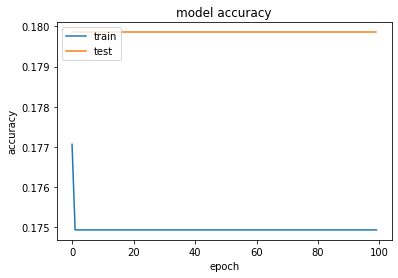

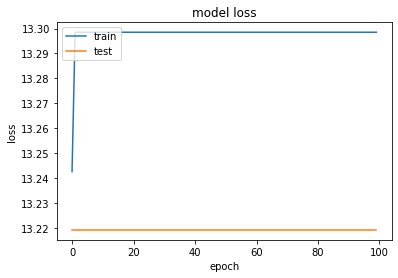

In [122]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()